In [11]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

## Load data and Define methods

In [ ]:
CSV_PATH = "./data"
PDF_PATH = "./figures"
DATA_PATH = os.path.join(CSV_PATH, 'data.csv')
data_df = pd.read_csv(DATA_PATH)

methods = ['Manual', 'SAM', 'SAM corrected']

## Heatmaps of Object IoU per Method

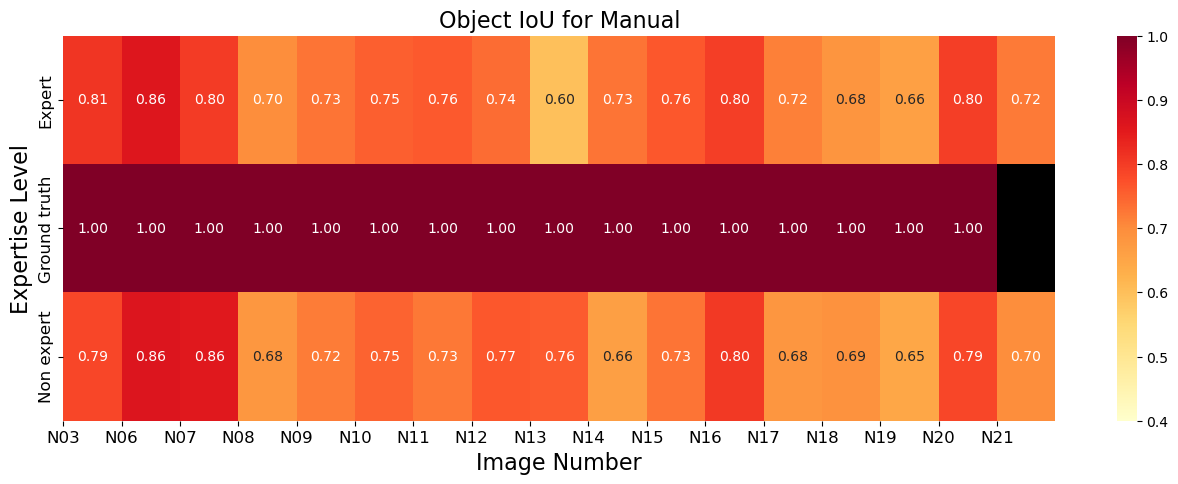

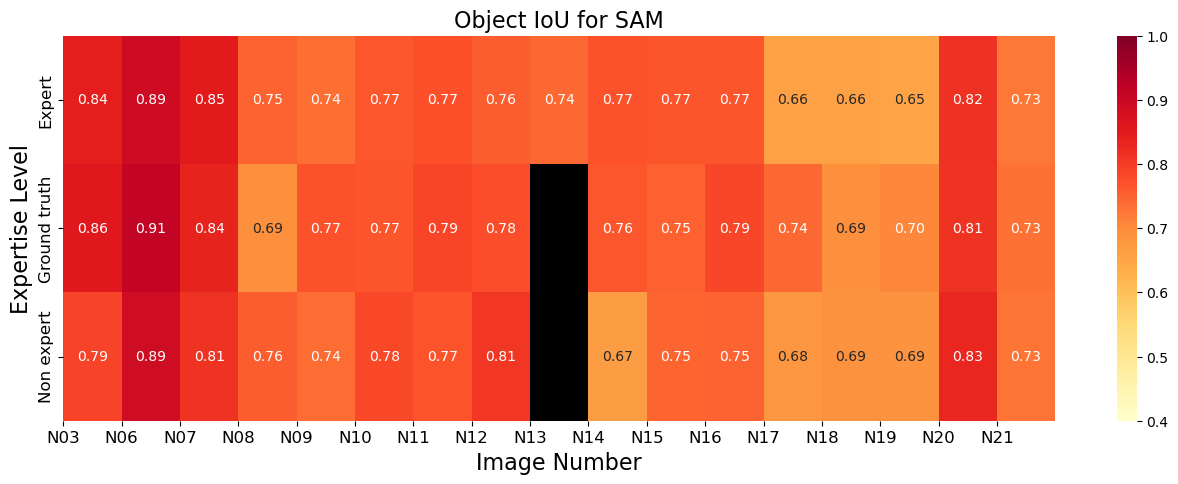

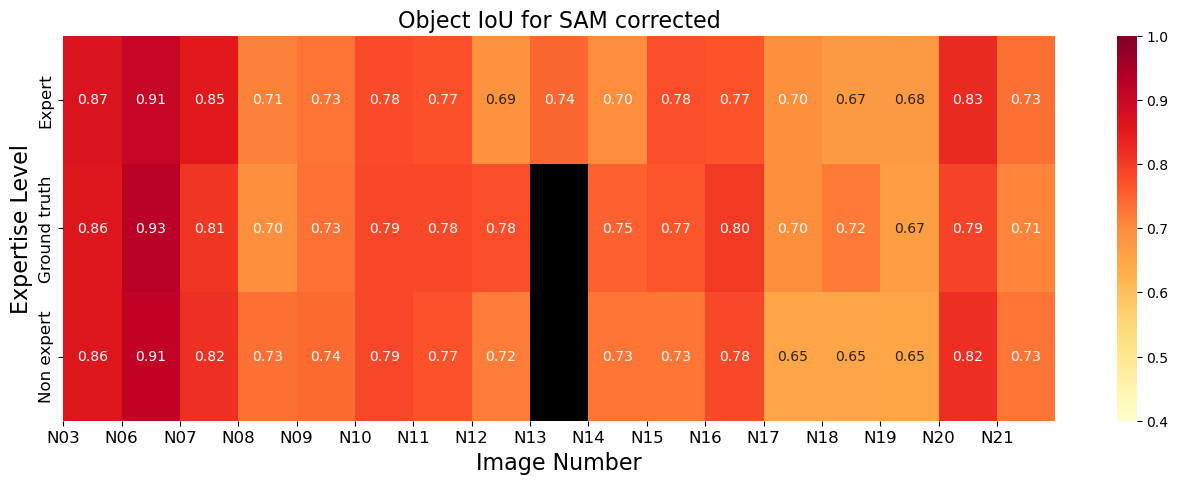

In [16]:
# Loop through each category to generate one heatmap per method
for method in methods:

    # Keep only rows corresponding to the current method
    method_df = data_df[data_df['Category'] == method]

    # Aggregate duplicate ('Expertise Level', 'Image Number') pairs by averaging 'Objects IoU'
    method_df = method_df.groupby(['Expertise Level', 'Image Number'], as_index=False)['Objects IoU'].mean()

    # Pivot the filtered data frame
    pivot_df = method_df.pivot(index='Expertise Level', columns='Image Number', values='Objects IoU')

    # Create the heatmap
    plt.figure(figsize=(16, 5))
    sns.heatmap(
        pivot_df,
        cmap='YlOrRd',       # Yellow-to-red color gradient
        annot=True,          # Display numeric values in cells
        fmt=".2f",           # Format numbers to two decimals
        vmin=0.4, vmax=1.0   # Fix color scale for consistency across plots
    )

    # Set the axes background to black (NaN cells appear black because they are transparent)
    plt.gca().patch.set_facecolor('black')

    # Add titles and labels
    plt.title(f'Object IoU for {method}', fontsize=16)
    plt.xlabel('Image Number', fontsize=16)
    plt.ylabel('Expertise Level', fontsize=16)
    plt.tick_params(axis='both', labelsize=12)

    # Clean and set x-axis labels
    x_labels = pivot_df.columns.tolist()
    # Replace NaN labels (if any) with empty strings
    x_labels = ['' if pd.isnull(label) else label for label in x_labels]
    plt.xticks(ticks=range(len(x_labels)), labels=x_labels)
    
    # Construct full save path and export the figure as a PDF
    if method.strip().lower() == "sam corrected":
        filename = "heatmap_IoU_SAM_corrected_expertise_levels_vs_images.pdf"
    else:
        filename = f"heatmap_IoU_{method}_expertise_levels_vs_images.pdf"

    path = os.path.join(PDF_PATH, filename)
    plt.savefig(path, format="pdf")

    plt.show()